# Medius Health Data Science Challenge
By Arwa Siddiqui

------------------------------------------------------------

### For the challenge: 
#### Data Description: 
1. Dataset is provided in “data” folder. Each file in the data folder is considered as a document.
2. There are 300 documents.
3. Each document has some text information.

#### Task Description: 
Grouping documents with the same semantic description into clusters. 
1. Process the text data in each document/file using NLP, data processing, text mining.
3. Develop a model to partition the data into multiple clusters. It is required to develop the end-to-end model in python instead of using any data clustering libraries or pre-trained models.

The **outcome** of the model: 
1. Number of clusters and the data points in each cluster. 
2. Report the number of clusters found in the data.
3. Find out the topics of each cluster. (You can run any benchmark off-the-shelf topic modelling algorithm like Latent Dirichlet Allocation (LDA) or PLSA)
4. If possible, visualize the cluster. (bonus point)

### To answer the challenge, the following notebook is set-up:
1. **Load imports/libraries**
2. **Process text files/documents to extract information**     
    * Extract files to make dataframe
    * Text mining, use NLTK to tokenize documents, remove stop-words, etc.   
    * Use Stemmer   
    * Use Frequency Dist to plot most common words 
    * Perform TF-IDF Vectorizer
3. **Building K-Means model, without clustering libraries (using sample numeric data)**
    * Create sample data as an example
    * Build K-Means algorithm from scratch 
    * Plot clusters of sample data
4. **Building K-Means model, with clustering libraries (using original text data from (1))**
    * Using *KMeans* from *sklearn* library to model document data
    * Find and plot optimal number of clusters, using Elbow Method  
5. **Perform LDA to find topics in clusters**
6. **Plot TSNE plot to visualise clusters**

## Load imports 

In [1]:
# Import required libraries 
import os
import re
from csv import reader
import numpy as np
import pandas as pd
import random as rd
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
%matplotlib inline

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import sklearn 
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import gensim
from gensim import corpora, models


Bad key "text.kerning_factor" on line 4 in
C:\Users\arwas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Text Mining and Processing

In [2]:
# Access documents from Dataset

flist = []
for root, dirs, files in os.walk('data/'):
    flist += [os.path.join(root, f) for f in files]
flist.pop(0)
print("Number of documents:", len(flist)) #Get a list of all files under the current directory

Number of documents: 300


In [3]:
# Read documents into one document (i.e. list)

my_dir_path = "./Medius-Health-Challenge/data"
results = defaultdict(list)
for file in flist:
    with open(file, "r") as file_open:
        results["filename"].append(file.replace("data/", ""))
        results["text"].append(file_open.read())
df = pd.DataFrame(results) #Create Dataframe
df.head()

,filename,text
0,176869,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
1,176878,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
2,176881,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
3,176884,Xref: cantaloupe.srv.cs.cmu.edu misc.headlines...
4,176886,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....


In [4]:
# Preprocess documents data

documents = re.split("[[0-9]+]|\n|\t|\\\\n|\\\\t", str(df['text'])) #remove unnecessary tabs, newlines, digits
tokenizer = RegexpTokenizer(r'\w+') #remove any punctuations
tokens = tokenizer.tokenize(str(documents)) #tokenize document data
processed_docs = nltk.sent_tokenize(str(documents))

# Lower case all words and make sorted vocabulary 
raw_words = [w.lower() for w in tokens]
stop_words = set(stopwords.words("english"))
new_words = []
for w in raw_words:
    if w not in stop_words:
        new_words.append(w)
        
# Remove unnecessary words, email addresses, category levels, etc.        
remove_words = ['edu', 'com', 'cmu', 'cs', 'cantaloupe', 'srv', 'newsgroups', 'cantaloupe',
               'xref', 'subject', 'id', 'message', 'from', 'date', 'sender', 
               'references', 'organization', 'lines', 'path', 'misc', 'alt', 'talk']
words = []
for w in new_words:  
    if w not in remove_words:
        words.append(w)

# Perform Stemmer 
p_stemmer = PorterStemmer()
texts = [p_stemmer.stem(i) for i in words]

C:\Users\arwas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Possible nested set at position 1
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# Find highest frequency of words
fdist = FreqDist(texts)
fdist.most_common(10)

[('polit', 34),
 ('cantal', 12),
 ('gun', 11),
 ('crabappl', 8),
 ('magnesium', 7),
 ('club', 7),
 ('4', 3),
 ('soc', 3),
 ('cultur', 3),
 ('headlin', 2)]

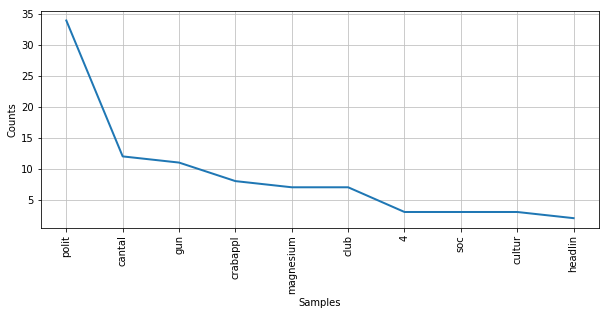

In [6]:
# Plot highest frequency of words
figure(figsize=(10, 4))
fdist.plot(10, cumulative=False)
plt.show()

In [7]:
# Perform TF-IDF Vectorizer/Transformer
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.95,
                             max_features = 8000,
                             stop_words='english')
X = vectorizer.fit_transform(texts)

## Building K-Means Clustering model from scratch 
The K-Means clustering algorithm is built below, without the use of clustering libraries. 

However, due to large "X" (TF-IDF output), this code cannot be run on the original document data due to memory issues and type of output. Therefore, a randomised and simplified numeric dataset is created to show how the K-Means clustering algorithm works, without the use of any clustering libraries.   

**Implementing K-Means clustering:**             
Step 1: Load data                    
Step 2: Calculate Euclidean distance - write a function and call it      
Step 3: Write code for K-Means clustering (and call Euclidean distance function)      
Step 4: Plotting clusters

To properly build a K-Means model, the _sklearn_'s _Kmeans_ library was used to continue the clustering analysis, using "X". 

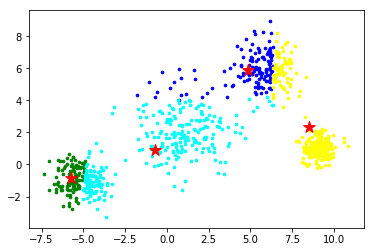

In [8]:
# Preprocessing to build randomised data as example

# Assigning centers of clusters
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and assign it to the four centers, each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4
data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

# Assign no. of clusters, mean, std, etc. 
k = 4 #four clusters
c = data.shape[1] #features of data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean


# Step 1: Load data
df = pd.DataFrame(data)
df.shape


# Step 2: Function for Euclidean distance
def E_dist(data1, data2):
    data1 = np.array(data1) 
    data2 = np.array(data2)
    return np.linalg.norm(data1 - data2)


# Step 3: Implementing K-Means Clustering 
k = 4
n = data.shape[0]
c = data.shape[1]
colors=['green', 'blue', 'yellow', 'cyan'] #assign colours to data

centers_old = np.zeros(centers.shape)
centers_new = centers  # Store new centers
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = E_dist(centers_new, centers_old)
while error != 0:  # Update everytime a new center is created
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    centers_old = centers_new

    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
        point=data[clusters == i]
        
        plt.scatter(point[:,0], point[:,1], s=7, c=colors[i])
    error = E_dist(centers_new, centers_old)
centers_new 

# Step 4: Plot clusters
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='red', edgecolor='red', s=150) #red star = centers of clusters

## Building K-Means model with sklearn library
Previously, an example of a simple numerical dataset was used to perform K-Means clustering. 
Now, a K-Means clustering library (*sklearn's KMeans*) will be used to conduct the analysis on the original text data ("X" from the TF-IDF Vectorizer/Transformer output). 

First, the optimal number of clusters is found by using the "Elbow Method". 
**The optimal number of clusters = 7.** 

C:\Users\arwas\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\arwas\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


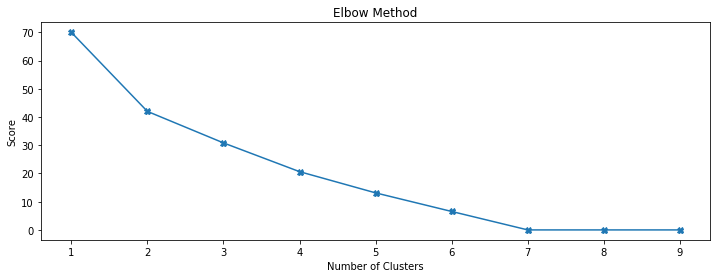

In [9]:
# Using KMeans library, find the optimal no. of clusters (Elbow Method)
number_clusters = range(1, 10)
score = []

for i in number_clusters:
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(X)
    score.append(kmeans.inertia_)

figure(figsize=(12, 4))
plt.plot(number_clusters, score, marker='X')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

## Implementing LDA to find topics
Latent Dirichlet Allocation (LDA) is performed to find the topics of the clusters. They are listed as: 
* Cluster 0 & 1: polit or "politics"
* Cluster 2: cantal or "cantaloupe"
* Cluster 3: magnesium
* Cluster 4: crabappl or "crabapple"
* Cluster 5: gun
* Cluster 6: club

The LDA code used here is referenced from this [link](https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html).

In [10]:
# Building corpus to implement into LDA

text = [t.split() for t in texts]
dictionary = corpora.Dictionary(text)
corpus = [dictionary.doc2bow(t) for t in text]

no_topics = 7
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=no_topics, id2word = dictionary, passes=20)
print(ldamodel.print_topics(num_topics=no_topics, num_words=2))

[(0, '0.245*"gun" + 0.157*"magnesium"'), (1, '0.273*"cantal" + 0.071*"4"'), (2, '0.212*"crabappl" + 0.186*"club"'), (3, '0.115*"cultur" + 0.078*"headlin"'), (4, '0.070*"abort" + 0.070*"c"'), (5, '0.129*"soc" + 0.047*"282"'), (6, '0.565*"polit" + 0.019*"1"')]


In [11]:
# Topics of clusters (visualised in next section)

labels = vectorizer.get_feature_names()

clusters = MiniBatchKMeans(n_clusters=7, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)
df = pd.DataFrame(X.todense()).groupby(clusters).mean()
for i, r in df.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([labels[t] for t in np.argsort(r)[-1:]]))


Cluster 0
polit

Cluster 1
polit

Cluster 2
cantal

Cluster 3
magnesium

Cluster 4
crabappl

Cluster 5
gun

Cluster 6
club


## Plot Clusters as TSNE Plot
In the plot, 7 clear clusters can be seen. Red consists of 2 seperate clusters (one large and one smaller), but are made up of the same topics. 

The TSNE code used here is referenced from this [link](https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans/notebook).

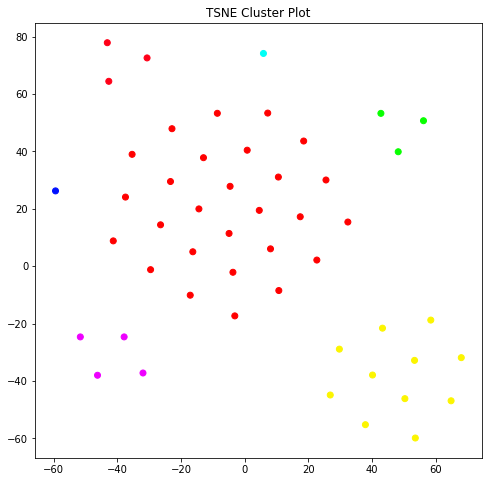

In [20]:
# Plotting clusters on TSNE plot

def plot_tsne(data, labels, num):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=num, replace=False)
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=6).fit_transform(data[max_items,:].todense()))
    
    idx = np.random.choice(range(pca.shape[0]), size=num, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    figure(figsize=(8, 8))
    plt.scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    plt.title('TSNE Cluster Plot')
    
plot_tsne(X, clusters, 50)